In [3]:
root_path = "/Users/danieldubovski/projects/deep_query_optimization"

import sys
import os
sys.path.insert(0, root_path)

In [4]:
# import tkinter
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib as mpl

plt_backend = mpl.get_backend()
print(plt_backend)
from matplotlib import pyplot as plt
import pandas as pd
from pandas import Panel
import numpy as np
import pytorch_lightning as pl
import torch
from importlib import reload 
from tqdm.auto import tqdm
from collections import Counter
import sklearn
import seaborn as sns
from sklearn import metrics as skm
import json
from dqo.estimator import evaluate as ge
from dqo.estimator.gerelt import v1, v2, v3, v4, v7, v15
from dqo import datasets

mpl.use(plt_backend)

module://ipykernel.pylab.backend_inline


/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  # Remove the CWD from sys.path while we load stuff.


In [3]:
import importlib

importlib.reload(datasets)
importlib.reload(ge)
importlib.reload(v1)
importlib.reload(v2)


<module 'dqo.estimator.gerelt.v2' from '/Users/danieldubovski/projects/deep_query_optimization/dqo/estimator/gerelt/v2/__init__.py'>

# TPCH

In [5]:
tpch = datasets.QueriesDataset('tpch:optimized')
tpch_sample = tpch.sample(n=500, strategy='bucketed')

2021-01-31 13:50:50,944 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpch/execution/optimized/runtimes/data_part_00.csv [1/1]
2021-01-31 13:50:51,901 | dqo.datasets | INFO | Loaded 22729 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpch/execution/optimized/runtimes/data_part_00.csv [1/1]


In [7]:
v2_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three/version_0/checkpoints/epoch=37-step=1973453.ckpt'), 
    dataset=tpch, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
v3_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v3/logs/three/version_0/checkpoints/epoch=56-step=2960180.ckpt'), 
    dataset=tpch, 
    encoder=v3.encoder, 
    model_cls=v3.model.GereltRegressor
)
v4_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v4/logs/three/version_0/checkpoints/epoch=38-step=2025386.ckpt'), 
    dataset=tpch, 
    encoder=v4.encoder, 
    model_cls=v4.model.GereltRegressor
)
v7_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v7/logs/three/version_1/checkpoints/epoch=30-step=1609922.ckpt'), 
    dataset=tpch, 
    encoder=v7.encoder, 
    model_cls=v7.model.GereltRegressor
)

In [8]:
v2_results = v2_estimater.evaluate(df=tpch_sample)
json.dumps(ge.evaluate_metrics(v2_results))

  0%|          | 0/457 [00:00<?, ?it/s]/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:227: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 457/457 [01:34<00:00,  4.83it/s]


'{"accuracy": 0.5492341356673961, "balanced accuracy": 0.4671052631578948, "kappa": 0.5083532219570406, "recall": 0.5080971659919029, "mae": 0.687089715536105, "f1 macro": 0.509626368923972, "f1 weighted": 0.5508871471519521}'

In [9]:
v3_results = v3_estimater.evaluate(df=tpch_sample)

100%|██████████| 457/457 [00:36<00:00, 12.53it/s]


In [10]:
json.dumps(ge.evaluate_metrics(v3_results))

'{"accuracy": 0.5798687089715536, "balanced accuracy": 0.49780701754385953, "kappa": 0.5417661097852029, "recall": 0.5364372469635627, "mae": 0.6323851203501094, "f1 macro": 0.52302025711751, "f1 weighted": 0.5653654420482493}'

In [11]:
v4_results = v4_estimater.evaluate(df=tpch_sample)

100%|██████████| 457/457 [01:32<00:00,  4.95it/s]


In [12]:
json.dumps(ge.evaluate_metrics(v4_results))

'{"accuracy": 0.5273522975929978, "balanced accuracy": 0.44517543859649117, "kappa": 0.4844868735083532, "recall": 0.48785425101214575, "mae": 0.737417943107221, "f1 macro": 0.4808777333360231, "f1 weighted": 0.5198109415054604}'

In [13]:
v7_results = v7_estimater.evaluate(df=tpch_sample)

100%|██████████| 457/457 [00:37<00:00, 12.20it/s]


In [14]:
json.dumps(ge.evaluate_metrics(v7_results))

'{"accuracy": 0.5339168490153173, "balanced accuracy": 0.4517543859649123, "kappa": 0.4916467780429594, "recall": 0.49392712550607293, "mae": 0.7614879649890591, "f1 macro": 0.4942126568467678, "f1 weighted": 0.5342254977730924}'

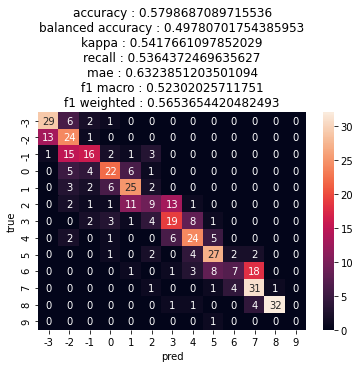

              precision    recall  f1-score   support

          -3       0.67      0.76      0.72        38
          -2       0.42      0.63      0.51        38
          -1       0.57      0.42      0.48        38
           0       0.59      0.58      0.59        38
           1       0.56      0.66      0.60        38
           2       0.41      0.24      0.30        38
           3       0.47      0.50      0.49        38
           4       0.59      0.63      0.61        38
           5       0.63      0.71      0.67        38
           6       0.54      0.18      0.27        38
           7       0.56      0.82      0.67        38
           8       0.97      0.84      0.90        38
           9       0.00      0.00      0.00         1

    accuracy                           0.58       457
   macro avg       0.54      0.54      0.52       457
weighted avg       0.58      0.58      0.57       457

2
           abs_err              err_ratio           
              mean      

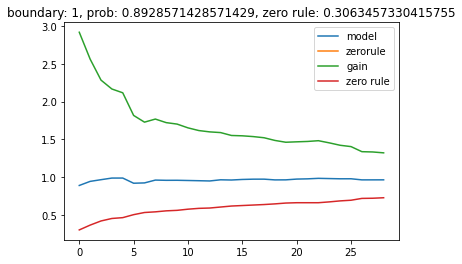

In [15]:
ge.display_results(v3_results)

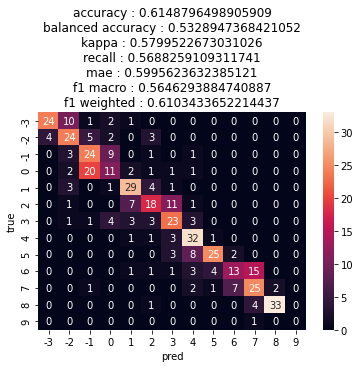

              precision    recall  f1-score   support

          -3       0.86      0.63      0.73        38
          -2       0.55      0.63      0.59        38
          -1       0.46      0.63      0.53        38
           0       0.38      0.29      0.33        38
           1       0.66      0.76      0.71        38
           2       0.55      0.47      0.51        38
           3       0.53      0.61      0.57        38
           4       0.63      0.84      0.72        38
           5       0.81      0.66      0.72        38
           6       0.59      0.34      0.43        38
           7       0.56      0.66      0.60        38
           8       0.94      0.87      0.90        38
           9       0.00      0.00      0.00         1

    accuracy                           0.61       457
   macro avg       0.58      0.57      0.56       457
weighted avg       0.62      0.61      0.61       457

2
           abs_err             err_ratio          
              mean      me

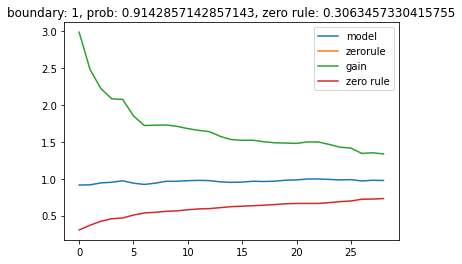

In [14]:
ge.display_results(v4_results)

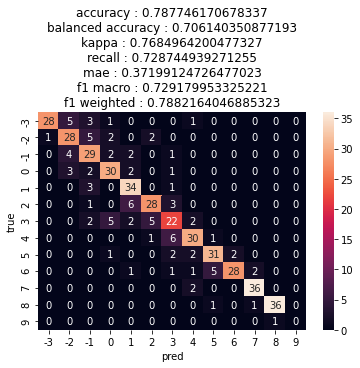

              precision    recall  f1-score   support

          -3       0.97      0.74      0.84        38
          -2       0.70      0.74      0.72        38
          -1       0.64      0.76      0.70        38
           0       0.73      0.79      0.76        38
           1       0.72      0.89      0.80        38
           2       0.78      0.74      0.76        38
           3       0.59      0.58      0.59        38
           4       0.79      0.79      0.79        38
           5       0.82      0.82      0.82        38
           6       0.93      0.74      0.82        38
           7       0.92      0.95      0.94        38
           8       0.97      0.95      0.96        38
           9       0.00      0.00      0.00         1

    accuracy                           0.79       457
   macro avg       0.74      0.73      0.73       457
weighted avg       0.80      0.79      0.79       457

2
           abs_err             err_ratio          
              mean      me

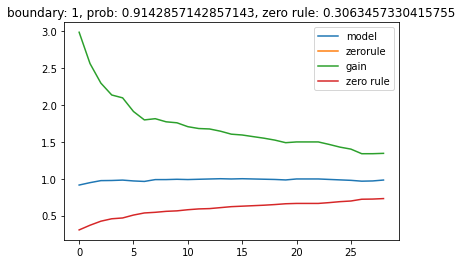

In [15]:
ge.display_results(v7_results)

# Trained on THREE, Inference on TPCD

In [16]:
tpcd = datasets.QueriesDataset('tpcd:optimized')
tpcd_sample = tpcd.sample(n=500, strategy='bucketed')

2021-01-31 14:02:04,627 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpcd/execution/optimized/runtimes/data_part_00.csv [1/1]
2021-01-31 14:02:05,664 | dqo.datasets | INFO | Loaded 23635 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpcd/execution/optimized/runtimes/data_part_00.csv [1/1]


In [17]:
v2_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three/version_0/checkpoints/epoch=37-step=1973453.ckpt'), 
    dataset=tpcd, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
v3_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v3/logs/three/version_0/checkpoints/epoch=56-step=2960180.ckpt'), 
    dataset=tpcd, 
    encoder=v3.encoder, 
    model_cls=v3.model.GereltRegressor
)
v4_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v4/logs/three/version_0/checkpoints/epoch=38-step=2025386.ckpt'), 
    dataset=tpcd, 
    encoder=v4.encoder, 
    model_cls=v4.model.GereltRegressor
)
v7_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v7/logs/three/version_1/checkpoints/epoch=30-step=1609922.ckpt'), 
    dataset=tpcd, 
    encoder=v7.encoder, 
    model_cls=v7.model.GereltRegressor
)

In [18]:
v2_results = v2_estimater.evaluate(df=tpcd_sample)
print(json.dumps(ge.evaluate_metrics(v2_results)))
v3_results = v3_estimater.evaluate(df=tpcd_sample)
print(json.dumps(ge.evaluate_metrics(v3_results)))
v4_results = v4_estimater.evaluate(df=tpcd_sample)
print(json.dumps(ge.evaluate_metrics(v4_results)))
v7_results = v7_estimater.evaluate(df=tpcd_sample)
print(json.dumps(ge.evaluate_metrics(v7_results)))

  4%|▍         | 19/467 [00:03<01:35,  4.67it/s]/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:227: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|          | 0/467 [00:00<?, ?it/s]

{"accuracy": 0.10492505353319058, "balanced accuracy": 0.024122807017543862, "kappa": 0.02564102564102566, "recall": 0.09919028340080972, "mae": 2.721627408993576, "f1 macro": 0.08284344408507321, "f1 weighted": 0.08763310787585901}


  0%|          | 0/467 [00:00<?, ?it/s]

{"accuracy": 0.14989293361884368, "balanced accuracy": 0.07017543859649122, "kappa": 0.07459207459207462, "recall": 0.1417004048582996, "mae": 2.563169164882227, "f1 macro": 0.12809503445030915, "f1 weighted": 0.13550095721296082}


  0%|          | 0/467 [00:00<?, ?it/s]

{"accuracy": 0.15845824411134904, "balanced accuracy": 0.07894736842105263, "kappa": 0.08391608391608396, "recall": 0.14979757085020243, "mae": 2.3704496788008567, "f1 macro": 0.1490121575790907, "f1 weighted": 0.15762742150764628}


100%|██████████| 467/467 [00:40<00:00, 11.66it/s]

{"accuracy": 0.10492505353319058, "balanced accuracy": 0.024122807017543862, "kappa": 0.02564102564102566, "recall": 0.09919028340080972, "mae": 2.8201284796573876, "f1 macro": 0.08921868638128554, "f1 weighted": 0.09437694019776242}


## NUMBERS VS STRINGS

In [16]:
qe = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three_opt_default_adam/version_1/checkpoints/epoch=60.ckpt'), 
    dataset=imdb, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
r = qe.evaluate(df=datasets.QueriesDataset('imdb:only_strings').load())
json.dumps(ge.evaluate_metrics(r))

2021-01-25 15:50:05,965 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_strings/runtimes/data_part_00.csv [1/1]
2021-01-25 15:50:05,970 | dqo.datasets | INFO | Loaded 47 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_strings/runtimes/data_part_00.csv [1/1]
100%|██████████| 47/47 [00:02<00:00, 20.69it/s]


'{"accuracy": 0.7659574468085106, "balanced accuracy": 0.785813492063492, "kappa": 0.7227882037533513, "recall": 0.8096119929453263, "mae": 0.23404255319148937, "f1 macro": 0.7920926205239931, "f1 weighted": 0.7689874094755195}'

In [17]:
qe = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three_opt_default_adam/version_1/checkpoints/epoch=60.ckpt'), 
    dataset=imdb, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
r = qe.evaluate(df=datasets.QueriesDataset('imdb:only_numbers').load())
json.dumps(ge.evaluate_metrics(r))

2021-01-25 15:50:22,596 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_numbers/runtimes/data_part_00.csv [1/1]
2021-01-25 15:50:22,601 | dqo.datasets | INFO | Loaded 124 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_numbers/runtimes/data_part_00.csv [1/1]
100%|██████████| 124/124 [00:07<00:00, 16.15it/s]
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


'{"accuracy": 0.6854838709677419, "balanced accuracy": 0.5517496392496393, "kappa": 0.6316551146317313, "recall": 0.5413997113997114, "mae": 0.3870967741935484, "f1 macro": 0.5584700352153182, "f1 weighted": 0.6928782798457175}'

## RANDOM QUERIES

In [17]:
v1_results.predict_query('select MIN(id) from aka_title')

0.3487551234163082

In [60]:
v1_results.predict_query('select MIN(id) from aka_title, cast_info where aka_title.movie_id = cast_info.movie_id and cast_info.note like "%a%"')

11.159208242646764

In [61]:
v1_results.predict_query('select MIN(id) from aka_title, cast_info where aka_title.movie_id = cast_info.movie_id and aka_title.movie_id > 10')

26.097686612759194

In [62]:
v1_results.predict_query('select MIN(id) from aka_title, cast_info where aka_title.movie_id = cast_info.movie_id')

98.77698618825976

In [63]:
v1_results.predict_query('select MIN(id) from cast_info')

2.9044822055115933

In [24]:
# overfitting

In [20]:
import re

epoch_num_regex = re.compile("epoch=(\d.*)-")

In [21]:
cp_path = os.path.join(os.getcwd(), 'v7/logs/three/version_1/checkpoints/')
cps = [os.path.join(cp_path, f) for f in os.listdir(cp_path)]
cps = sorted(cps, key= lambda s: int(epoch_num_regex.search(s)[1]))

v = v7
for cp in tqdm(cps):
    qe = ge.QueryEstimater(cp, dataset=tpcd, encoder=v.encoder, model_cls=v.model.GereltRegressor)
    r = qe.evaluate(df=tpcd_sample)
    print(int(epoch_num_regex.search(cp)[1]), json.dumps(ge.evaluate_metrics(r)))

  0%|          | 0/467 [00:00<?, ?it/s]

0 {"accuracy": 0.13704496788008566, "balanced accuracy": 0.05701754385964912, "kappa": 0.06060606060606055, "recall": 0.12955465587044535, "mae": 2.644539614561028, "f1 macro": 0.07838984921164752, "f1 weighted": 0.08292202464786698}


  0%|          | 0/467 [00:00<?, ?it/s]

10 {"accuracy": 0.145610278372591, "balanced accuracy": 0.06578947368421051, "kappa": 0.06993006993006978, "recall": 0.13765182186234817, "mae": 2.7623126338329764, "f1 macro": 0.11339100984322789, "f1 weighted": 0.11994680698619825}


  0%|          | 0/467 [00:00<?, ?it/s]

20 {"accuracy": 0.11777301927194861, "balanced accuracy": 0.03728070175438597, "kappa": 0.03962703962703962, "recall": 0.11133603238866398, "mae": 2.8436830835117775, "f1 macro": 0.08606701896384138, "f1 weighted": 0.09104305646282151}


  0%|          | 0/467 [00:00<?, ?it/s]

21 {"accuracy": 0.10920770877944326, "balanced accuracy": 0.028508771929824574, "kappa": 0.030303030303030276, "recall": 0.10323886639676115, "mae": 2.811563169164882, "f1 macro": 0.07509125045671523, "f1 weighted": 0.07943271461588293}


  0%|          | 0/467 [00:00<?, ?it/s]

22 {"accuracy": 0.11777301927194861, "balanced accuracy": 0.03728070175438597, "kappa": 0.03962703962703962, "recall": 0.11133603238866398, "mae": 2.8265524625267666, "f1 macro": 0.08865853777478337, "f1 weighted": 0.09378440612578799}


  0%|          | 0/467 [00:00<?, ?it/s]

23 {"accuracy": 0.13062098501070663, "balanced accuracy": 0.05043859649122805, "kappa": 0.05361305361305346, "recall": 0.1234817813765182, "mae": 2.9443254817987152, "f1 macro": 0.10454621020971647, "f1 weighted": 0.11059063778072793}


  0%|          | 0/467 [00:00<?, ?it/s]

24 {"accuracy": 0.145610278372591, "balanced accuracy": 0.06578947368421051, "kappa": 0.06993006993006978, "recall": 0.13765182186234817, "mae": 2.7922912205567454, "f1 macro": 0.11059533641474634, "f1 weighted": 0.11698949933380019}


  0%|          | 0/467 [00:00<?, ?it/s]

25 {"accuracy": 0.13704496788008566, "balanced accuracy": 0.05701754385964912, "kappa": 0.06060606060606055, "recall": 0.12955465587044535, "mae": 2.8436830835117775, "f1 macro": 0.10780652272772105, "f1 weighted": 0.11403944802461287}


  0%|          | 0/467 [00:00<?, ?it/s]

26 {"accuracy": 0.15203426124197003, "balanced accuracy": 0.07236842105263157, "kappa": 0.07692307692307687, "recall": 0.1437246963562753, "mae": 2.8650963597430406, "f1 macro": 0.11426551143200375, "f1 weighted": 0.12087186862400395}


  0%|          | 0/467 [00:00<?, ?it/s]

27 {"accuracy": 0.11991434689507495, "balanced accuracy": 0.03947368421052629, "kappa": 0.04195804195804198, "recall": 0.11336032388663966, "mae": 2.8586723768736615, "f1 macro": 0.09923374025377477, "f1 weighted": 0.10497102288086668}


  0%|          | 0/467 [00:00<?, ?it/s]

28 {"accuracy": 0.13276231263383298, "balanced accuracy": 0.052631578947368404, "kappa": 0.05594405594405594, "recall": 0.12550607287449392, "mae": 2.9143468950749463, "f1 macro": 0.10396964200930163, "f1 weighted": 0.10998073480213066}


  0%|          | 0/467 [00:00<?, ?it/s]

29 {"accuracy": 0.12633832976445397, "balanced accuracy": 0.04605263157894735, "kappa": 0.04895104895104896, "recall": 0.11943319838056679, "mae": 2.845824411134904, "f1 macro": 0.09730361582605043, "f1 weighted": 0.10292930667680711}


  0%|          | 0/467 [00:00<?, ?it/s]

30 {"accuracy": 0.10492505353319058, "balanced accuracy": 0.024122807017543862, "kappa": 0.02564102564102566, "recall": 0.09919028340080972, "mae": 2.8201284796573876, "f1 macro": 0.08921868638128554, "f1 weighted": 0.09437694019776242}


100%|██████████| 467/467 [00:44<00:00, 10.39it/s]

31 {"accuracy": 0.15203426124197003, "balanced accuracy": 0.07236842105263157, "kappa": 0.07692307692307687, "recall": 0.1437246963562753, "mae": 2.8008565310492504, "f1 macro": 0.12210134996277912, "f1 weighted": 0.12916074278717965}



In [22]:
cp_path = os.path.join(os.getcwd(), 'v4/logs/three/version_0/checkpoints/')
cps = [os.path.join(cp_path, f) for f in os.listdir(cp_path)]
cps = sorted(cps, key= lambda s: int(epoch_num_regex.search(s)[1]))

v = v4
for cp in tqdm(cps):
    qe = ge.QueryEstimater(cp, dataset=tpcd, encoder=v.encoder, model_cls=v.model.GereltRegressor)
    r = qe.evaluate(df=tpcd_sample)
    print(int(epoch_num_regex.search(cp)[1]), json.dumps(ge.evaluate_metrics(r)))

  0%|          | 0/467 [00:00<?, ?it/s]

0 {"accuracy": 0.1841541755888651, "balanced accuracy": 0.10526315789473684, "kappa": 0.11188811188811187, "recall": 0.17408906882591094, "mae": 2.411134903640257, "f1 macro": 0.11309295162251295, "f1 weighted": 0.11963151627734775}


  0%|          | 0/467 [00:00<?, ?it/s]

1 {"accuracy": 0.1777301927194861, "balanced accuracy": 0.09868421052631578, "kappa": 0.1048951048951049, "recall": 0.1680161943319838, "mae": 2.342612419700214, "f1 macro": 0.12516673017052898, "f1 weighted": 0.13240335054441396}


  0%|          | 0/467 [00:00<?, ?it/s]

2 {"accuracy": 0.16059957173447537, "balanced accuracy": 0.08114035087719296, "kappa": 0.08624708624708621, "recall": 0.15182186234817813, "mae": 2.226980728051392, "f1 macro": 0.11394453566749017, "f1 weighted": 0.1205323353741759}


  0%|          | 0/467 [00:00<?, ?it/s]

3 {"accuracy": 0.16274089935760172, "balanced accuracy": 0.08333333333333333, "kappa": 0.08857808857808858, "recall": 0.15384615384615385, "mae": 2.2248394004282654, "f1 macro": 0.11596170649324523, "f1 weighted": 0.12266613063739432}


  0%|          | 0/467 [00:00<?, ?it/s]

4 {"accuracy": 0.12205567451820129, "balanced accuracy": 0.041666666666666664, "kappa": 0.044289044289044344, "recall": 0.11538461538461539, "mae": 2.3233404710920773, "f1 macro": 0.08348166147225866, "f1 weighted": 0.08830822434110447}


  0%|          | 0/467 [00:00<?, ?it/s]

5 {"accuracy": 0.14989293361884368, "balanced accuracy": 0.07017543859649122, "kappa": 0.07459207459207462, "recall": 0.1417004048582996, "mae": 2.3704496788008567, "f1 macro": 0.11037990572954166, "f1 weighted": 0.11676161334131388}


  0%|          | 0/467 [00:00<?, ?it/s]

6 {"accuracy": 0.10492505353319058, "balanced accuracy": 0.024122807017543862, "kappa": 0.02564102564102566, "recall": 0.09919028340080972, "mae": 2.4475374732334045, "f1 macro": 0.07997754859823826, "f1 weighted": 0.08460151821740834}


  0%|          | 0/467 [00:00<?, ?it/s]

7 {"accuracy": 0.13276231263383298, "balanced accuracy": 0.05263157894736843, "kappa": 0.05594405594405594, "recall": 0.12550607287449395, "mae": 2.321199143468951, "f1 macro": 0.08992019088923389, "f1 weighted": 0.09511900278218743}


  0%|          | 0/467 [00:00<?, ?it/s]

8 {"accuracy": 0.11777301927194861, "balanced accuracy": 0.03728070175438594, "kappa": 0.03962703962703962, "recall": 0.11133603238866395, "mae": 2.3811563169164884, "f1 macro": 0.08775681721698114, "f1 weighted": 0.09283055183123914}


  0%|          | 0/467 [00:00<?, ?it/s]

9 {"accuracy": 0.14346895074946467, "balanced accuracy": 0.06359649122807016, "kappa": 0.06759906759906764, "recall": 0.13562753036437247, "mae": 2.449678800856531, "f1 macro": 0.10523229944438418, "f1 weighted": 0.11131639384480899}


  0%|          | 0/467 [00:00<?, ?it/s]

10 {"accuracy": 0.12633832976445397, "balanced accuracy": 0.04605263157894735, "kappa": 0.04895104895104896, "recall": 0.11943319838056679, "mae": 2.379014989293362, "f1 macro": 0.09154478601335755, "f1 weighted": 0.09683752524753451}


  0%|          | 0/467 [00:00<?, ?it/s]

11 {"accuracy": 0.11991434689507495, "balanced accuracy": 0.03947368421052628, "kappa": 0.04195804195804198, "recall": 0.11336032388663965, "mae": 2.4775160599571735, "f1 macro": 0.08769881937345157, "f1 weighted": 0.09276920079332991}


  0%|          | 0/467 [00:00<?, ?it/s]

12 {"accuracy": 0.14775160599571735, "balanced accuracy": 0.06798245614035085, "kappa": 0.07226107226107226, "recall": 0.13967611336032387, "mae": 2.436830835117773, "f1 macro": 0.11121922387823308, "f1 weighted": 0.11764945737868768}


  0%|          | 0/467 [00:00<?, ?it/s]

13 {"accuracy": 0.11349036402569593, "balanced accuracy": 0.03289473684210524, "kappa": 0.034965034965035, "recall": 0.10728744939271254, "mae": 2.5096359743040684, "f1 macro": 0.08426598441784804, "f1 weighted": 0.08913789358119258}


  0%|          | 0/467 [00:00<?, ?it/s]

14 {"accuracy": 0.13062098501070663, "balanced accuracy": 0.05043859649122803, "kappa": 0.053613053613053574, "recall": 0.12348178137651819, "mae": 2.4603854389721627, "f1 macro": 0.12081087400080368, "f1 weighted": 0.1277956568659465}


  0%|          | 0/467 [00:00<?, ?it/s]

15 {"accuracy": 0.16274089935760172, "balanced accuracy": 0.08333333333333333, "kappa": 0.08857808857808858, "recall": 0.15384615384615385, "mae": 2.3340471092077086, "f1 macro": 0.1348890726985039, "f1 weighted": 0.1426877985290384}


  0%|          | 0/467 [00:00<?, ?it/s]

16 {"accuracy": 0.14989293361884368, "balanced accuracy": 0.0701754385964912, "kappa": 0.07459207459207462, "recall": 0.14170040485829957, "mae": 2.3319057815845823, "f1 macro": 0.131647761542767, "f1 weighted": 0.13925908822725247}


  0%|          | 0/467 [00:00<?, ?it/s]

17 {"accuracy": 0.12419700214132762, "balanced accuracy": 0.043859649122806994, "kappa": 0.046620046620046596, "recall": 0.11740890688259108, "mae": 2.468950749464668, "f1 macro": 0.10884119169004772, "f1 weighted": 0.11513393724814469}


  0%|          | 0/467 [00:00<?, ?it/s]

18 {"accuracy": 0.13704496788008566, "balanced accuracy": 0.05701754385964912, "kappa": 0.06060606060606055, "recall": 0.12955465587044535, "mae": 2.3618843683083512, "f1 macro": 0.1280765240699717, "f1 weighted": 0.13548137663932763}


  0%|          | 0/467 [00:00<?, ?it/s]

19 {"accuracy": 0.16488222698072805, "balanced accuracy": 0.08552631578947367, "kappa": 0.09090909090909083, "recall": 0.15587044534412955, "mae": 2.4967880085653107, "f1 macro": 0.14673501922372092, "f1 weighted": 0.15521862847220155}


  0%|          | 0/467 [00:00<?, ?it/s]

20 {"accuracy": 0.16274089935760172, "balanced accuracy": 0.0833333333333333, "kappa": 0.08857808857808858, "recall": 0.15384615384615383, "mae": 2.321199143468951, "f1 macro": 0.1473094633007022, "f1 weighted": 0.15582628451937233}


  0%|          | 0/467 [00:00<?, ?it/s]

21 {"accuracy": 0.1734475374732334, "balanced accuracy": 0.09429824561403508, "kappa": 0.10023310023310028, "recall": 0.16396761133603238, "mae": 2.4025695931477515, "f1 macro": 0.15000864291591667, "f1 weighted": 0.15868151948707243}


  0%|          | 0/467 [00:00<?, ?it/s]

22 {"accuracy": 0.145610278372591, "balanced accuracy": 0.06578947368421051, "kappa": 0.0699300699300699, "recall": 0.13765182186234817, "mae": 2.284796573875803, "f1 macro": 0.12457905863412456, "f1 weighted": 0.13178170228106537}


  0%|          | 0/467 [00:00<?, ?it/s]

23 {"accuracy": 0.16488222698072805, "balanced accuracy": 0.0855263157894737, "kappa": 0.09090909090909094, "recall": 0.15587044534412958, "mae": 2.30406852248394, "f1 macro": 0.1374532828248903, "f1 weighted": 0.14540026063275335}


  0%|          | 0/467 [00:00<?, ?it/s]

24 {"accuracy": 0.15417558886509636, "balanced accuracy": 0.07456140350877191, "kappa": 0.07925407925407912, "recall": 0.145748987854251, "mae": 2.28051391862955, "f1 macro": 0.13797718319035687, "f1 weighted": 0.1459544507409771}


  0%|          | 0/467 [00:00<?, ?it/s]

25 {"accuracy": 0.18201284796573874, "balanced accuracy": 0.10307017543859649, "kappa": 0.10955710955710951, "recall": 0.17206477732793524, "mae": 2.310492505353319, "f1 macro": 0.15711557139966706, "f1 weighted": 0.16619934105232448}


  0%|          | 0/467 [00:00<?, ?it/s]

26 {"accuracy": 0.15417558886509636, "balanced accuracy": 0.07456140350877191, "kappa": 0.07925407925407923, "recall": 0.145748987854251, "mae": 2.267665952890792, "f1 macro": 0.1272529362459109, "f1 weighted": 0.13461017238860815}


  0%|          | 0/467 [00:00<?, ?it/s]

27 {"accuracy": 0.16059957173447537, "balanced accuracy": 0.081140350877193, "kappa": 0.08624708624708632, "recall": 0.15182186234817815, "mae": 2.3811563169164884, "f1 macro": 0.1372642637934913, "f1 weighted": 0.14520031330617714}


  0%|          | 0/467 [00:00<?, ?it/s]

28 {"accuracy": 0.15417558886509636, "balanced accuracy": 0.07456140350877191, "kappa": 0.07925407925407923, "recall": 0.145748987854251, "mae": 2.3190578158458246, "f1 macro": 0.13002502774331645, "f1 weighted": 0.13754253470063882}


  0%|          | 0/467 [00:00<?, ?it/s]

29 {"accuracy": 0.17558886509635974, "balanced accuracy": 0.09649122807017545, "kappa": 0.10256410256410253, "recall": 0.1659919028340081, "mae": 2.233404710920771, "f1 macro": 0.14723147202083392, "f1 weighted": 0.1557437841076916}


  0%|          | 0/467 [00:00<?, ?it/s]

30 {"accuracy": 0.1734475374732334, "balanced accuracy": 0.0942982456140351, "kappa": 0.10023310023310039, "recall": 0.1639676113360324, "mae": 2.2569593147751608, "f1 macro": 0.14452546448192122, "f1 weighted": 0.15288132645410935}


  0%|          | 0/467 [00:00<?, ?it/s]

31 {"accuracy": 0.15631691648822268, "balanced accuracy": 0.07675438596491228, "kappa": 0.0815850815850816, "recall": 0.14777327935222673, "mae": 2.2933618843683083, "f1 macro": 0.12873152026840007, "f1 weighted": 0.13617424199697994}


  0%|          | 0/467 [00:00<?, ?it/s]

32 {"accuracy": 0.1905781584582441, "balanced accuracy": 0.11184210526315792, "kappa": 0.11888111888111885, "recall": 0.1801619433198381, "mae": 2.267665952890792, "f1 macro": 0.16175727540615675, "f1 weighted": 0.17110940910201597}


  0%|          | 0/467 [00:00<?, ?it/s]

33 {"accuracy": 0.16916488222698073, "balanced accuracy": 0.08991228070175433, "kappa": 0.09557109557109555, "recall": 0.15991902834008093, "mae": 2.3404710920770877, "f1 macro": 0.14713652976697936, "f1 weighted": 0.15564335268712592}


  0%|          | 0/467 [00:00<?, ?it/s]

34 {"accuracy": 0.18201284796573874, "balanced accuracy": 0.10307017543859649, "kappa": 0.10955710955710951, "recall": 0.17206477732793524, "mae": 2.3169164882226982, "f1 macro": 0.15473215229950743, "f1 weighted": 0.16367812256093503}


  0%|          | 0/467 [00:00<?, ?it/s]

35 {"accuracy": 0.1948608137044968, "balanced accuracy": 0.11622807017543861, "kappa": 0.12354312354312358, "recall": 0.1842105263157895, "mae": 2.3019271948608138, "f1 macro": 0.16279938066341468, "f1 weighted": 0.17221176455616027}


  0%|          | 0/467 [00:00<?, ?it/s]

36 {"accuracy": 0.16274089935760172, "balanced accuracy": 0.08333333333333333, "kappa": 0.08857808857808858, "recall": 0.15384615384615385, "mae": 2.4089935760171306, "f1 macro": 0.13592205740736857, "f1 weighted": 0.14378050612256973}


  0%|          | 0/467 [00:00<?, ?it/s]

37 {"accuracy": 0.1670235546038544, "balanced accuracy": 0.08771929824561402, "kappa": 0.09324009324009319, "recall": 0.15789473684210525, "mae": 2.2955032119914347, "f1 macro": 0.1396812725927385, "f1 weighted": 0.14775706351351778}


100%|██████████| 467/467 [01:03<00:00,  7.31it/s]

38 {"accuracy": 0.15845824411134904, "balanced accuracy": 0.07894736842105263, "kappa": 0.08391608391608396, "recall": 0.14979757085020243, "mae": 2.3704496788008567, "f1 macro": 0.1490121575790907, "f1 weighted": 0.15762742150764628}

